# Import

In [1]:
# Basic Library
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Creation list of Audio
from glob import glob

# library to work on audio files
import librosa
import librosa.display
import IPython.display as ipd

# Color generators for visualization
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Pytorch 

import torch
from torchaudio.transforms import MelSpectrogram

#Transfer learning
 #ResNET161

# Download a whole Git Repertory

In [3]:
import os
import requests

def download_ESC50 ():
    # GitHub repository URL and folder path
    github_repo_url = "https://github.com/karolpiczak/ESC-50"
    folder_path = "audio"

    # Directory where you want to store the downloaded files
    download_dir = "ESC-50"

    # Create the download directory if it doesn't exist
    os.makedirs(download_dir, exist_ok=True)

    # Get the contents of the folder using the GitHub API
    api_url = f"https://api.github.com/repos/karolpiczak/ESC-50/contents/{folder_path}"

    # Send a GET request to the GitHub API
    response = requests.get(api_url)

    if response.status_code == 200:
        # Parse the JSON response
        files = response.json()

        # Download each file from the folder
        for file_info in files:
            if file_info["type"] == "file":
                file_name = file_info["name"]
                file_download_url = file_info["download_url"]
                local_file_path = os.path.join(download_dir, file_name)

                # Download the file
                response = requests.get(file_download_url)
                if response.status_code == 200:
                    with open(local_file_path, "wb") as file:
                        file.write(response.content)
                    print(f"Downloaded: {file_name}")
                else:
                    print(f"Failed to download: {file_name}")
            else:
                print(f"Skipping directory: {file_info['name']}")
    else:
        print(f"Failed to fetch folder contents from {github_repo_url}")


In [64]:
# Remove comment if you want to download 
# download_ESC50 ()

# Test audios and visualization

In [36]:
# put all audios into a list
audio_files = glob('ESC-50/*.wav')

In [39]:
print(f'type of audio_file: {type(audio_files)}\n')
print(f'10 first audio names: {audio_files[:10]}\n')

print('First audio of the list:')
ipd.Audio(audio_files[120])

type of audio_file: <class 'list'>

10 first audio names: ['ESC-50/1-104089-A-22.wav', 'ESC-50/1-96950-B-9.wav', 'ESC-50/2-105270-A-47.wav', 'ESC-50/1-47273-A-21.wav', 'ESC-50/1-39901-A-11.wav', 'ESC-50/1-19840-A-36.wav', 'ESC-50/1-28135-B-11.wav', 'ESC-50/2-134915-A-30.wav', 'ESC-50/2-60180-A-49.wav', 'ESC-50/3-135650-B-45.wav']

First audio of the list:


In [40]:
# load librosa audio
y, sr= librosa.load(audio_files[120])

#y: raw values
# sr: sample rate
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-0.11907082  0.35402536  0.6387273   0.20561296 -0.04393832  0.16696317
  0.08583757 -0.06867453 -0.07618095 -0.20332   ]
shape y: (110250,)
sr: 22050


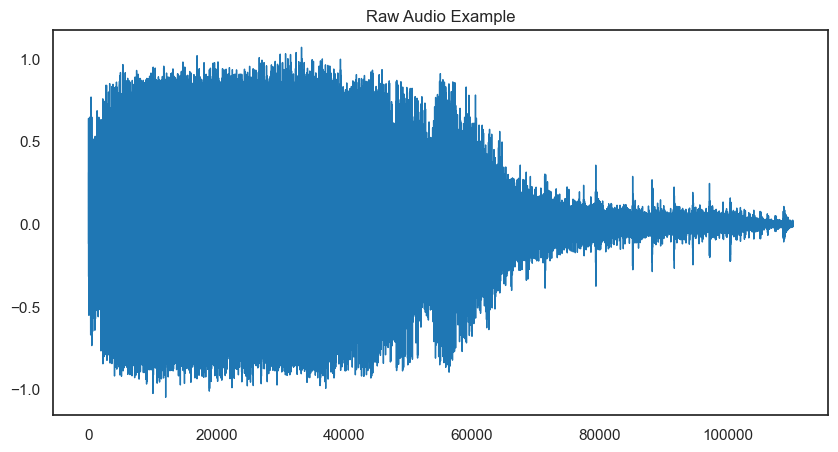

In [41]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [8]:
# remove the silence sounds (not needed for my data but
# useful to know)

y_trimmed, _ = librosa.effects.trim(y, top_db=20)

#top_db used if db tolerance is lower or higher

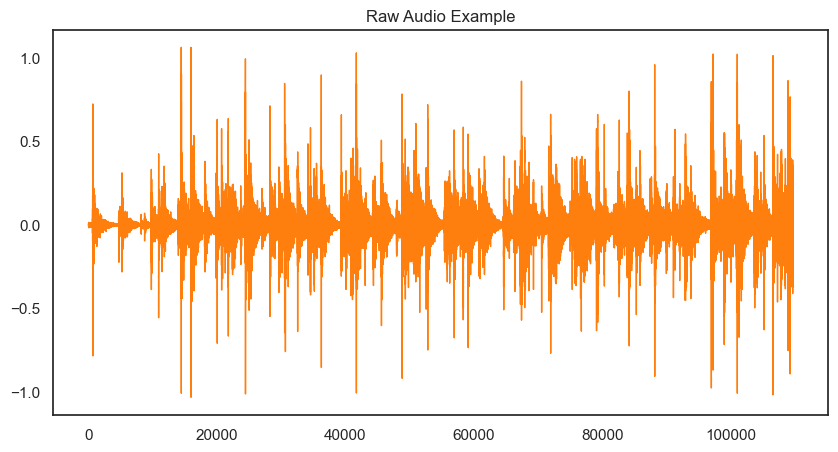

In [9]:
# Trimmed data 

pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[1])
plt.show()

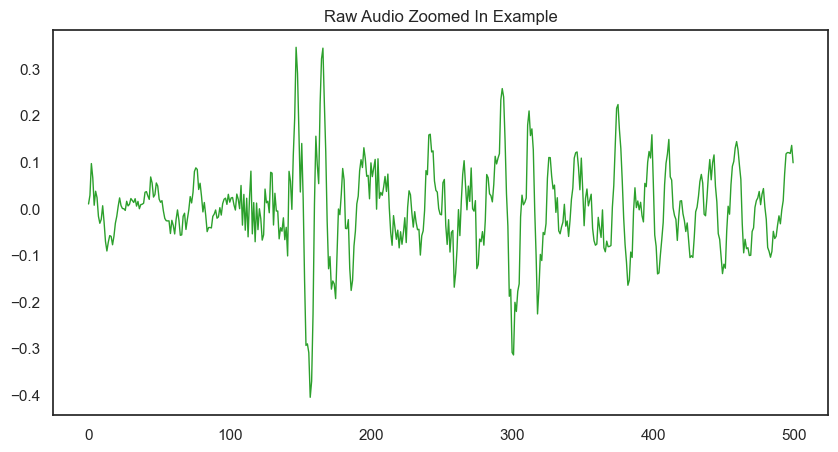

In [10]:
# Zoomed in visualization

pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

# Spectrogram part for our data

In [43]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 216)

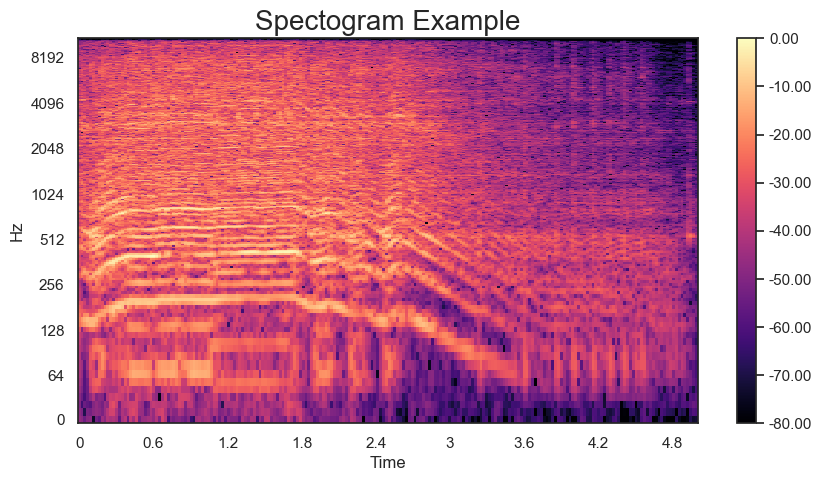

In [44]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [45]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

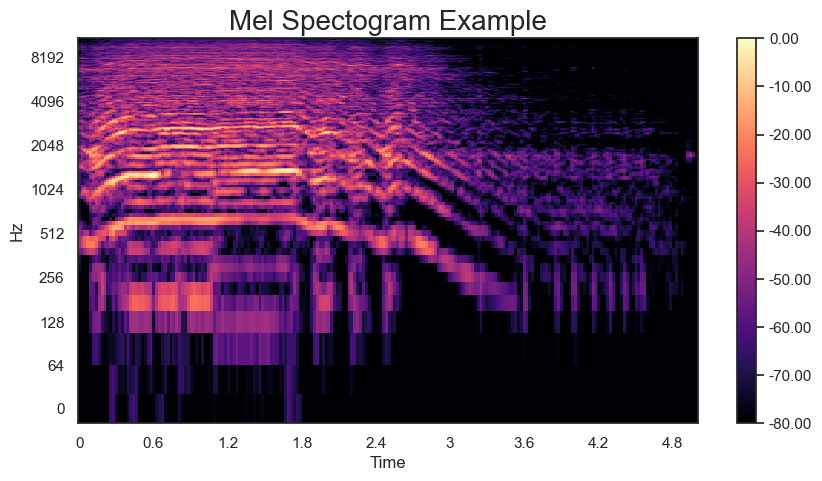

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [54]:
# Inverse MelSpectrogram to Array like audio
S_inv=librosa.feature.inverse.mel_to_audio(S)

In [55]:
print(f'first audio shape:{y.shape}')
print(f'mel_Spec shape:{S.shape}')
print(f'Reverse_Mel:{S_inv.shape}')

first audio shape:(110250,)
mel_Spec shape:(256, 216)
Reverse_Mel:(110080,)


In [63]:
np.max(S)

2046.1012

In [60]:
print(np.min(y),np.min(S_inv), np.max(y), np.max(S_inv))

-1.0480783 -1.6179152 1.0686641 1.8395878


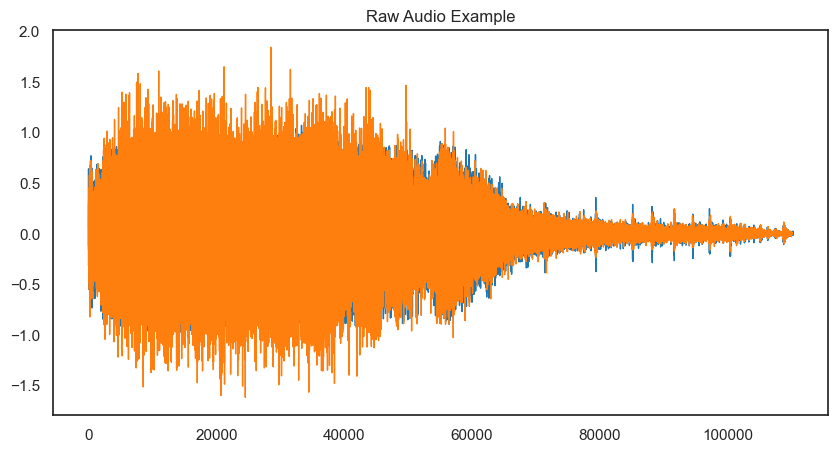

In [56]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])

pd.Series(S_inv).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[1])
plt.show()

In [57]:
S_inv.shape

(110080,)

In [58]:
import scipy
filename='Reverse_y.wav'
rate=sr
data=S_inv
scipy.io.wavfile.write(filename, rate, data)

In [59]:
ipd.Audio(filename)

# MelSpectrogram into Tensor

In [ ]:
y_tensor=torch.tensor(y)

In [ ]:
transform=MelSpectrogram(sample_rate=sr)

In [ ]:
transform(y_tensor)

In [ ]:
y_tensor.shape